## char addition
* DIGITS = 2

* one example

 * original input: **12 + 2**, output: **15** 
 
 after encoding
 * encoded input: **12+2#**, output: **15#**

 and **#** used to pad the strings to same length

```
>>> train_X.shape, train_y.shape
>>> (5050, 5), (5050, 3, 12)
```
![](http://oe5p7f8mz.bkt.clouddn.com/addition_digits2_01.png)

```
>>> reversed_X = train_X[:, ::-1]
>>> combined_X = np.concatenate([train_X, reversed_X], axis=0)
>>> combined_y = np.concatenate([train_y, train_y], axis=0)
>>> combined_X.shape, combined_y.shape
>>> (10100, 5), (10100, 3, 12)
```
![](http://oe5p7f8mz.bkt.clouddn.com/addition_digits2_02.png)

使用数据多的模型训练的结果反而更差?

after reversing, the above encoded input/output will be
```
reversed input: #2+21, output: #51
```
presumely, such reversing will confuse the model, as **2+21#** --> **23#**.

Thus, we can cancel the padding term, and add one end-of-string term

* one example

 * original input: **1+2**, output: **3** 
 * encoded input: **1+2##**, output: **3##** (2 **#** padded in order to keep same sequence length) 
 
 new encoding manner
 * encoded input: **1+2#**, output: **3#** (one **#** just acts as end-of-line symbol which exists in every string)

* second example
 * original input: **25+30**, output: **55**
 * encoded input: **25+30#**, output: **55#**
 
thus, lengths of input/output will no longer be fixed 

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

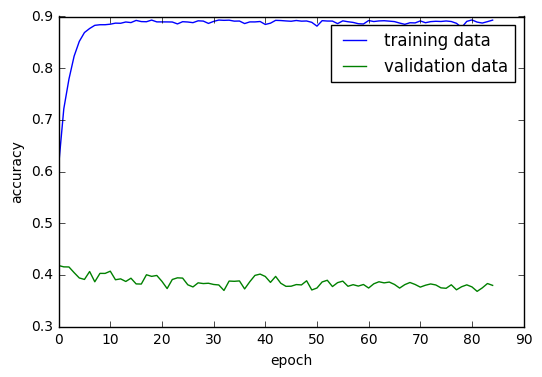

In [35]:
#csv_file_1 = '/home/huizhu/huizhu/feynman/addition/logs/logger_1.csv'
csv_file_2 = '/home/huizhu/huizhu/feynman/addition/logs/logger.csv'
#df_1 = pd.read_csv(csv_file_1)
df_1 = pd.read_csv(csv_file_2)

plt.plot(df_1.epoch, df_1.acc, label='training data')
plt.plot(df_1.epoch, df_1.val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

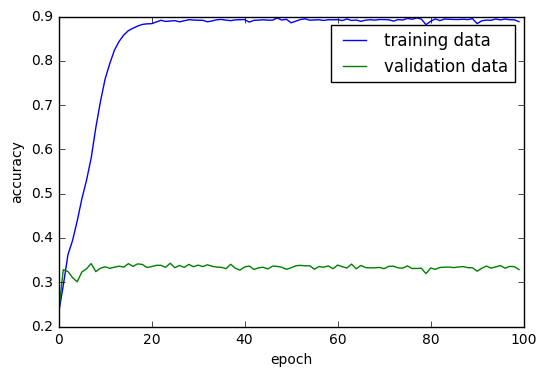

In [32]:
plt.plot(df_2.epoch, df_2.acc, label='training data')
plt.plot(df_2.epoch, df_2.val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

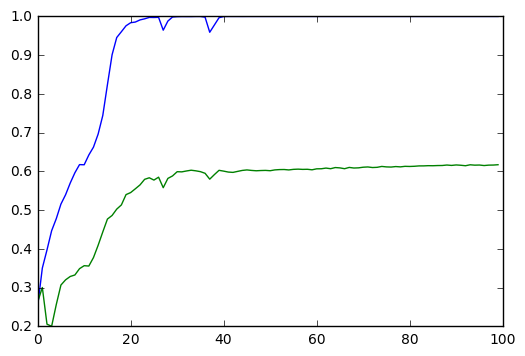

In [33]:
csv_file = '/home/huizhu/huizhu/feynman/addition/logs/logger_2.csv'
plot(csv_file)

In [10]:
def plot(csv_file):
    df = pd.read_csv(csv_file)
    plt.plot(df.epoch, df.acc, label='train')
    plt.plot(df.epoch, df.val_acc, label='valid')
    plt.show()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
x[:, ::-1]

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8]])